<a href="https://colab.research.google.com/github/rvgithubi/GraficosCurso/blob/main/2025B_Tec_Emergentes_Clustering_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wine dataset

In [ ]:
from sklearn.datasets import load_wine

import pandas as pd

wine = load_wine()

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

wine_df['cultivar'] = wine.target

print(wine_df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  cultivar  
0        

#Diabetes Dataset

In [ ]:
import sklearn.datasets as db

diabetes=db.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
print(diabetes.feature_names)

In [ ]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


# Obtener mejor K

In [ ]:
!pip install kneed  #Methodo para seleccionar mejor K

In [ ]:
from kneed import KneeLocator

In [ ]:
variable=range(1, 11)

In [ ]:
print(type(variable))

<class 'range'>


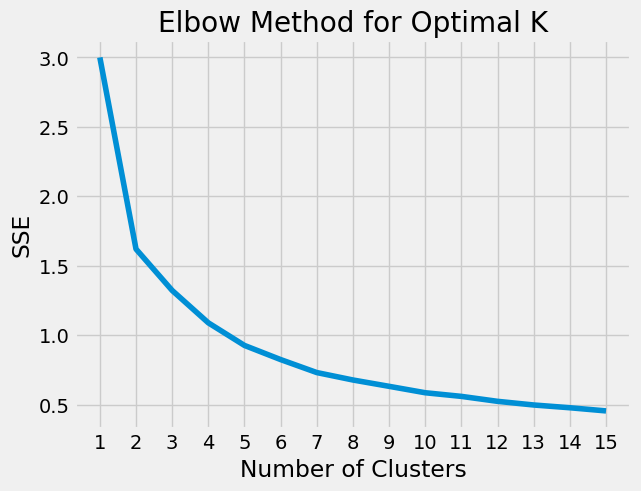

Optimal number of clusters:  4


In [ ]:
import pandas as pd

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt #Graficos


diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)  #Datos sklean a pandas (dataframe)


X = diabetes_df[['bmi', 's4','s5']]  #Seleccionar tres variables importantes  #Que hace esta linea de código.

# Determine the optimal number of clusters using the elbow method
sse = []  #Lista/Vector/Arreglo Unidimensional
for k in range(1, 16):  # Cluster 1 hasta 10// range(1,11) --> [1,2,3,4,5,6,7,8,9,10]
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  #random_state, n_init, Aseguran aleatoridad de los centroides iniciales
    kmeans.fit(X) #Entrenamiento
    sse.append(kmeans.inertia_) #Metrica
    #print(k, kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 16), sse)  #mostrando x,y. Done x=[1,2,3,4,5,6,7,8,9,10], y=[i1,i2,i3...]
plt.xticks(range(1, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()

#Knee Method parameters
kl = KneeLocator(range(1, 16), sse, curve="convex", direction="decreasing")  #retorna mejor K
optimal_k = kl.elbow

print("Optimal number of clusters: ",optimal_k)



In [ ]:

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X)

clusters = kmeans.predict(X)

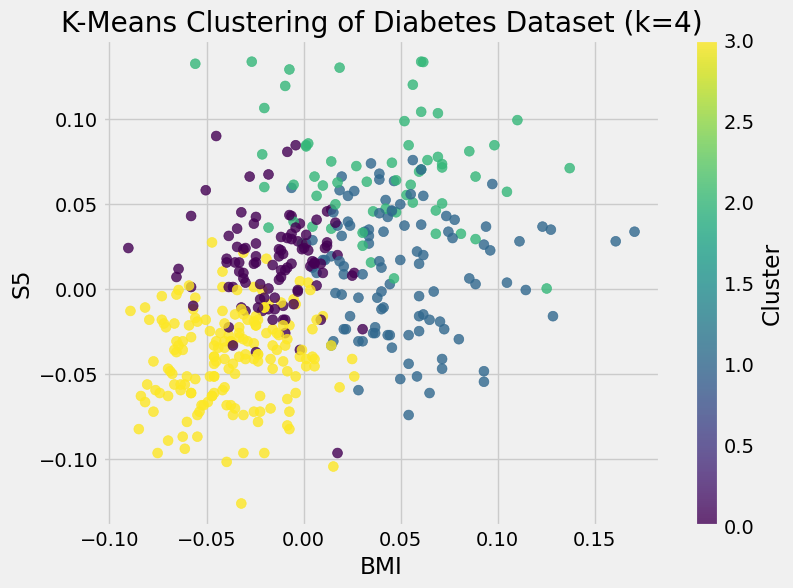

In [ ]:
#Visualizacion Incorrecta ** Originalmente son 3 datos (3D), pretendiendo visualizar solo 2

# Add the cluster labels to the dataframe
diabetes_df['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['bmi'], X['s5'], c=clusters, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('BMI')
plt.ylabel('S5')
plt.title(f'K-Means Clustering of Diabetes Dataset (k={optimal_k})')
plt.colorbar(label='Cluster')
plt.show()


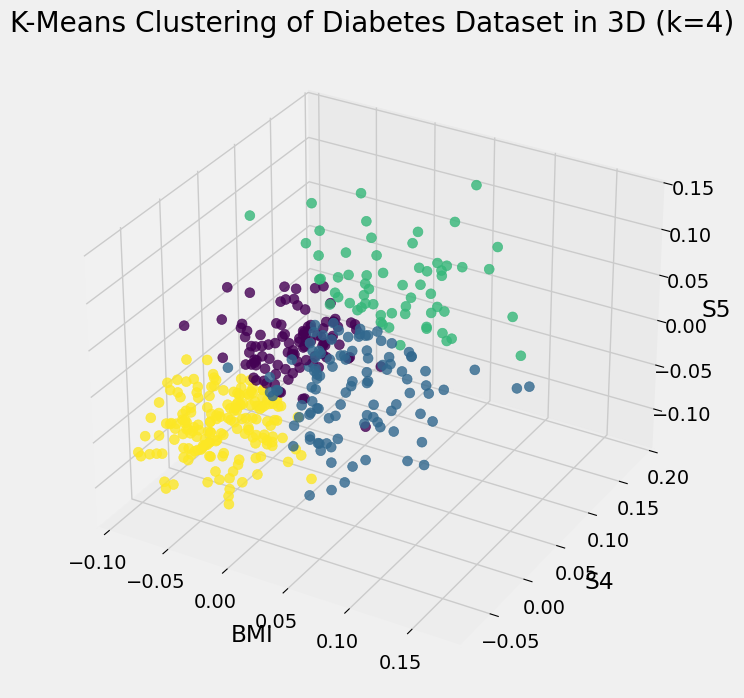

In [ ]:

import matplotlib.pyplot as plt
# 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['bmi'], X['s4'], X['s5'], c=clusters, cmap='viridis', s=50, alpha=0.8)  #Solo visualiza 2D hasta 2021/2022

ax.set_xlabel('BMI')
ax.set_ylabel('S4')
ax.set_zlabel('S5')
ax.set_title(f'K-Means Clustering of Diabetes Dataset in 3D (k={optimal_k})')

plt.show()

#Proyeccion de 3D a 2D

##PCA

In [ ]:
print(X)

          bmi        s4        s5
0    0.061696 -0.002592  0.019907
1   -0.051474 -0.039493 -0.068332
2    0.044451 -0.002592  0.002861
3   -0.011595  0.034309  0.022688
4   -0.036385 -0.002592 -0.031988
..        ...       ...       ...
437  0.019662 -0.002592  0.031193
438 -0.015906  0.034309 -0.018114
439 -0.015906 -0.011080 -0.046883
440  0.039062  0.026560  0.044529
441 -0.073030 -0.039493 -0.004222

[442 rows x 3 columns]


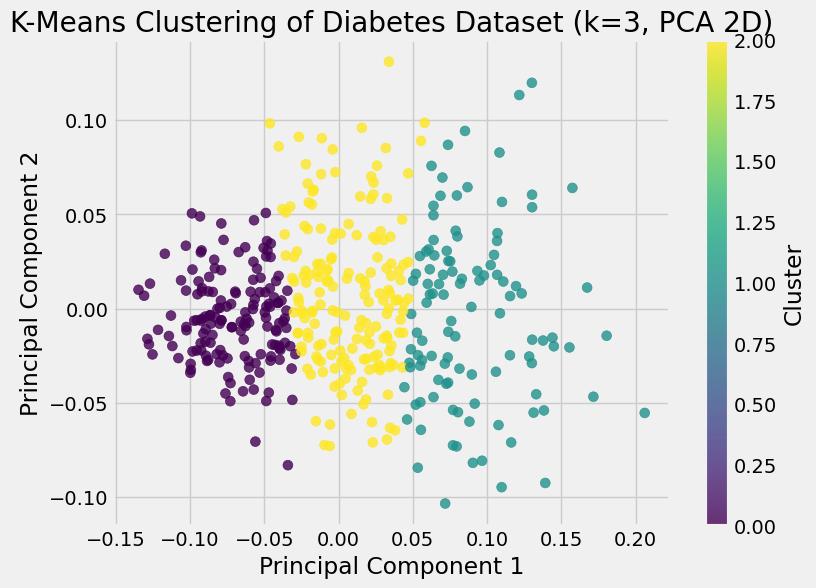

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce X to 2 dimensions
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)  #Entrenamiento

# Apply K-means clustering with the optimal number of clusters on the 2D data
kmeans_2d = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_2d.fit(X_2d)
clusters_2d = kmeans_2d.predict(X_2d)

# Add the cluster labels to the dataframe
diabetes_df['cluster_2d'] = clusters_2d

# Visualize the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters_2d, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering of Diabetes Dataset (k={optimal_k}, PCA 2D)')
plt.colorbar(label='Cluster')
plt.show()

##T-SNE

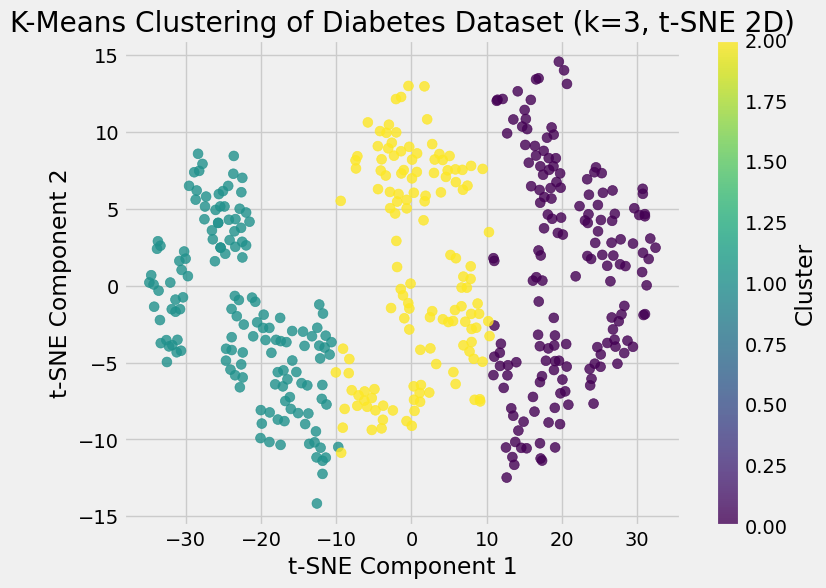

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE to reduce X to 2 dimensions
tsne = TSNE(n_components=2, random_state=42) #Configurando TSNE para 2 dimensiones
X_tsne_2d = tsne.fit_transform(X)  #Entrena

# Apply K-means clustering with the optimal number of clusters on the 2D t-SNE data
kmeans_tsne_2d = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_tsne_2d.fit(X_tsne_2d)
clusters_tsne_2d = kmeans_tsne_2d.predict(X_tsne_2d)

# Add the cluster labels to the dataframe
diabetes_df['cluster_tsne_2d'] = clusters_tsne_2d

# Visualize the clusters in 2D after t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=clusters_tsne_2d, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title(f'K-Means Clustering of Diabetes Dataset (k={optimal_k}, t-SNE 2D)')
plt.colorbar(label='Cluster')
plt.show()


##UMAP

In [ ]:
!pip install umap-learn[plot]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 40.0 MB/s eta 0:00:00


In [ ]:
#!pip install holoviews
#!pip install -U ipykernel

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,

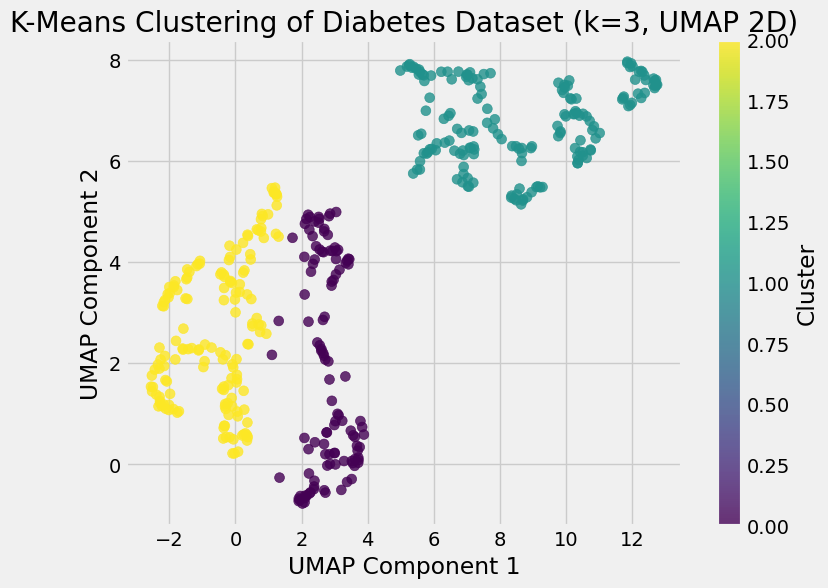

In [ ]:
import matplotlib.pyplot as plt
import umap
import umap.plot

# Apply UMAP to reduce X to 2 dimensions
reducer = umap.UMAP(random_state=42) #Siempre 2D
X_umap_2d = reducer.fit_transform(X)

# Apply K-means clustering with the optimal number of clusters on the 2D UMAP data
kmeans_umap_2d = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_umap_2d.fit(X_umap_2d)
clusters_umap_2d = kmeans_umap_2d.predict(X_umap_2d)

# Add the cluster labels to the dataframe
diabetes_df['cluster_umap_2d'] = clusters_umap_2d

# Visualize the clusters in 2D after UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=clusters_umap_2d, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title(f'K-Means Clustering of Diabetes Dataset (k={optimal_k}, UMAP 2D)')
plt.colorbar(label='Cluster')
plt.show()